#Libraries

In [100]:
# importing libraries

import pandas as pd
import numpy as np
from  sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt



df = pd.read_csv('/content/train_E1GspfA.csv')  # read csv file

In [101]:
df.head()   


,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [102]:

df.info()  #checking for any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


#Data Preprocessing

In [103]:
#Handling missing values

unique_days = df['date'].unique().tolist()
unique_hours = range(0,24)

final = pd.DataFrame()

for each in unique_days:

  temp = df[df['date'] == each]
  
  hours = temp['hour'].unique().tolist()
  missing_hours = list(set(unique_hours) - set(hours))
  
  temp = temp.append(pd.DataFrame({'hour': missing_hours}))
  temp['demand'] = temp['demand'].fillna(df.demand.mean())

  temp['date'] = each
  temp = temp.sort_values(by=['hour'])
  temp = temp.reset_index(drop = True)
  temp = temp.round()

  final = final.append(temp)

In [104]:
final.head(24)

,date,hour,demand
0,2018-08-18,0.0,74.0
1,2018-08-18,1.0,74.0
2,2018-08-18,2.0,74.0
3,2018-08-18,3.0,74.0
4,2018-08-18,4.0,74.0
5,2018-08-18,5.0,74.0
6,2018-08-18,6.0,74.0
7,2018-08-18,7.0,74.0
8,2018-08-18,8.0,74.0
9,2018-08-18,9.0,91.0


#Feature Enginnering

In [105]:
# adding new features based on date using  pandas

final['date'] = pd.to_datetime(final['date'], format = '%Y-%m-%d', errors = 'coerce')

final['date_year'] = final['date'].dt.year
final['date_month'] = final['date'].dt.month
final['date_week'] = final['date'].dt.week
final['date_day'] = final['date'].dt.day


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [106]:
final.head()

,date,hour,demand,date_year,date_month,date_week,date_day
0,2018-08-18,0.0,74.0,2018,8,33,18
1,2018-08-18,1.0,74.0,2018,8,33,18
2,2018-08-18,2.0,74.0,2018,8,33,18
3,2018-08-18,3.0,74.0,2018,8,33,18
4,2018-08-18,4.0,74.0,2018,8,33,18


#Visualization

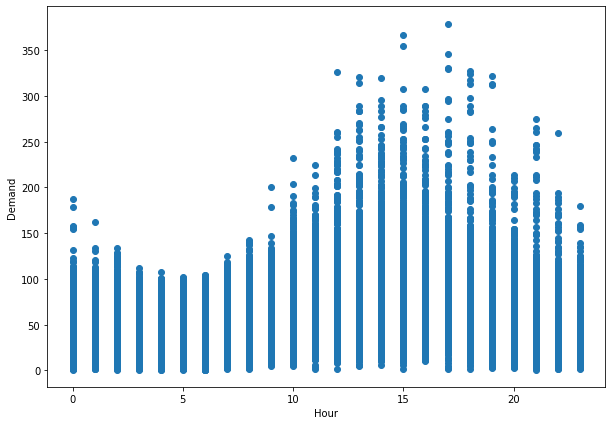

In [107]:
# Visualization 
plt.figure(figsize=(10,7))
plt.xlabel('Hour')
plt.ylabel('Demand')
plt.scatter(final.hour,final.demand)



# Modelling

In [108]:
y = final.demand
final = final.drop(['date','demand'],axis = 'columns')


In [109]:

rf = RandomForestRegressor(n_estimators=100,criterion = "squared_error",max_depth= 10)
rf.fit(final,y)

RandomForestRegressor(max_depth=10)

In [110]:

test = pd.read_csv('/content/test_6QvDdzb.csv')
test['date'] = pd.to_datetime(test['date'], format = '%Y-%m-%d', errors = 'coerce')
test['date_year'] = test['date'].dt.year
test['date_month'] = test['date'].dt.month
test['date_week'] = test['date'].dt.week
test['date_day'] = test['date'].dt.day
test = test.drop('date',axis = 'columns')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [111]:
#Submission
submission = pd.read_csv('/content/sample_4E0BhPN.csv')
final_predictions = rf.predict(test)
submission['demand'] = final_predictions.round()
submission.to_csv('sample.csv',index = False)